In [2]:
import frontiers_yildizetal as fy
from frontiers_yildizetal.scalar_emulators2 import *
import pkg_resources
import pandas as pd
import numpy as np
from scipy.stats import skew

In [3]:
pem = Simulations('simple_pem')
pem_scalar = pem.curate_scalars(threshold=0.1, loc_x=1000, loc_y=2000)

Calculating IA...
IA calculated.
Calculating DA...
DA calculated.
Calculating DV...
DV calculated.
Extracting QoI: vmax... 
QoI: vmax extracted.
Extracting QoI: hmax... 
QoI: hmax extracted.


In [4]:
simple = ScalarEmulators('simple', h_threshold=0.1, loc_x=1000, loc_y=2000)

Calculating IA...
IA calculated.
Calculating DA...
DA calculated.
Calculating DV...
DV calculated.
Extracting QoI: vmax... 
QoI: vmax extracted.
Extracting QoI: hmax... 
QoI: hmax extracted.


In [5]:
scalars = list(pem_scalar.columns)
mcs_analysis = ['mcs1','mcs2','mcs3']
pem_analysis = ['pem1','pem2','pem3']
funcs = [np.mean, np.var, skew]
f_names = ['mean','var','skew']

In [6]:
mcs_moments = {}
for i in scalars:
    for j in mcs_analysis:
        path = 'files/input/input_' + j + '_simple.csv'
        filepath = pkg_resources.resource_filename('frontiers_yildizetal', path)
        input = pd.read_csv(filepath).to_numpy()
        
        predicted = simple.predict_scalar(i, input)[0]
        for k, f in enumerate(funcs):
            naming = j + '_' + i + '_' + f_names[k]
            mcs_moments[naming] = round(f(predicted),3)

The upper bounds of the range parameters are 8.621307 64491.08 44.41758 
The initial values of range parameters are 0.1724261 1289.822 0.8883516 
Start of the optimization  1  : 
The number of iterations is  15 
 The value of the  marginal posterior  function is  125.4472 
 Optimized range parameters are 0.2238966 1588.852 2.063857 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The initial values of range parameters are 0.07730886 578.3035 0.3983007 
Start of the optimization  2  : 
The number of iterations is  22 
 The value of the  marginal posterior  function is  125.4472 
 Optimized range parameters are 0.2238966 1588.852 2.063857 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The upper bounds of the range parameters are 8.621307 64491.08 44.41758 
The initial values of range parameters are 0.1724261 1289.822 0.8883516 
Start of the optimization  1  : 
The number of iterations is  15 
 The value of the  marginal posterior  function is  125.4472 
 Optimized range p

In [7]:
mcs_moments

{'mcs1_ia_mean': 2.346,
 'mcs1_ia_var': 0.011,
 'mcs1_ia_skew': -0.064,
 'mcs2_ia_mean': 2.342,
 'mcs2_ia_var': 0.058,
 'mcs2_ia_skew': 0.074,
 'mcs3_ia_mean': 2.364,
 'mcs3_ia_var': 0.114,
 'mcs3_ia_skew': 0.456,
 'mcs1_da_mean': 1.141,
 'mcs1_da_var': 0.004,
 'mcs1_da_skew': -0.036,
 'mcs2_da_mean': 1.141,
 'mcs2_da_var': 0.021,
 'mcs2_da_skew': -0.134,
 'mcs3_da_mean': 1.177,
 'mcs3_da_var': 0.04,
 'mcs3_da_skew': 0.261,
 'mcs1_dv_mean': 1.367,
 'mcs1_dv_var': 0.02,
 'mcs1_dv_skew': 0.06,
 'mcs2_dv_mean': 1.369,
 'mcs2_dv_var': 0.098,
 'mcs2_dv_skew': 0.025,
 'mcs3_dv_mean': 1.368,
 'mcs3_dv_var': 0.148,
 'mcs3_dv_skew': 0.006,
 'mcs1_vmax_mean': 50.764,
 'mcs1_vmax_var': 2.333,
 'mcs1_vmax_skew': -0.256,
 'mcs2_vmax_mean': 50.012,
 'mcs2_vmax_var': 16.198,
 'mcs2_vmax_skew': -0.529,
 'mcs3_vmax_mean': 48.768,
 'mcs3_vmax_var': 50.742,
 'mcs3_vmax_skew': -0.705,
 'mcs1_hmax_mean': 11.189,
 'mcs1_hmax_var': 0.491,
 'mcs1_hmax_skew': -0.723,
 'mcs2_hmax_mean': 11.046,
 'mcs2_hmax_var'

In [8]:
pem_moments = {}
for i, mcs in enumerate(pem_analysis):
    data = pem_scalar.iloc[8*i:8*(i+1),:]
    for scalar in scalars:
        for j, f in enumerate(funcs):
            naming = mcs + '_' + scalar + '_' + f_names[j]
            pem_moments[naming] = round(f(data[scalar]),3)
        

In [9]:
pem_moments

{'pem1_ia_mean': 2.344,
 'pem1_ia_var': 0.011,
 'pem1_ia_skew': 0.002,
 'pem1_da_mean': 1.134,
 'pem1_da_var': 0.004,
 'pem1_da_skew': -0.033,
 'pem1_dv_mean': 1.371,
 'pem1_dv_var': 0.02,
 'pem1_dv_skew': 0.0,
 'pem1_vmax_mean': 50.529,
 'pem1_vmax_var': 2.441,
 'pem1_vmax_skew': 0.063,
 'pem1_hmax_mean': 11.095,
 'pem1_hmax_var': 0.649,
 'pem1_hmax_skew': 0.03,
 'pem2_ia_mean': 2.335,
 'pem2_ia_var': 0.069,
 'pem2_ia_skew': 0.199,
 'pem2_da_mean': 1.133,
 'pem2_da_var': 0.027,
 'pem2_da_skew': 0.11,
 'pem2_dv_mean': 1.37,
 'pem2_dv_var': 0.126,
 'pem2_dv_skew': 0.0,
 'pem2_vmax_mean': 50.065,
 'pem2_vmax_var': 15.048,
 'pem2_vmax_skew': 0.067,
 'pem2_hmax_mean': 11.049,
 'pem2_hmax_var': 3.026,
 'pem2_hmax_skew': 0.004,
 'pem3_ia_mean': 2.325,
 'pem3_ia_var': 0.296,
 'pem3_ia_skew': 0.445,
 'pem3_da_mean': 1.15,
 'pem3_da_var': 0.112,
 'pem3_da_skew': 0.179,
 'pem3_dv_mean': 1.368,
 'pem3_dv_var': 0.504,
 'pem3_dv_skew': 0.0,
 'pem3_vmax_mean': 47.36,
 'pem3_vmax_var': 66.905,
 'pem3

In [10]:
import matplotlib.pyplot as plt

In [58]:
x = [1,1,2,2,3,3]
ia_mean = mcs_moments['mcs1_ia_mean'], pem_moments['pem1_ia_mean'], mcs_moments['mcs2_ia_mean'], pem_moments['pem2_ia_mean'], mcs_moments['mcs3_ia_mean'], pem_moments['pem3_ia_mean']
ia_var = mcs_moments['mcs1_ia_var'], pem_moments['pem1_ia_var'], mcs_moments['mcs2_ia_var'], pem_moments['pem2_ia_var'], mcs_moments['mcs3_ia_var'], pem_moments['pem3_ia_var']
ia_skew = mcs_moments['mcs1_ia_skew'], pem_moments['pem1_ia_skew'], mcs_moments['mcs2_ia_skew'], pem_moments['pem2_ia_skew'], mcs_moments['mcs3_ia_skew'], pem_moments['pem3_ia_skew']

In [59]:
da_mean = mcs_moments['mcs1_da_mean'], pem_moments['pem1_da_mean'], mcs_moments['mcs2_da_mean'], pem_moments['pem2_da_mean'], mcs_moments['mcs3_da_mean'], pem_moments['pem3_da_mean']
da_var = mcs_moments['mcs1_da_var'], pem_moments['pem1_da_var'], mcs_moments['mcs2_da_var'], pem_moments['pem2_da_var'], mcs_moments['mcs3_da_var'], pem_moments['pem3_da_var']
da_skew = mcs_moments['mcs1_da_skew'], pem_moments['pem1_da_skew'], mcs_moments['mcs2_da_skew'], pem_moments['pem2_da_skew'], mcs_moments['mcs3_da_skew'], pem_moments['pem3_da_skew']

In [60]:
dv_mean = mcs_moments['mcs1_dv_mean'], pem_moments['pem1_dv_mean'], mcs_moments['mcs2_dv_mean'], pem_moments['pem2_dv_mean'], mcs_moments['mcs3_dv_mean'], pem_moments['pem3_dv_mean']
dv_var = mcs_moments['mcs1_dv_var'], pem_moments['pem1_dv_var'], mcs_moments['mcs2_dv_var'], pem_moments['pem2_dv_var'], mcs_moments['mcs3_dv_var'], pem_moments['pem3_dv_var']
dv_skew = mcs_moments['mcs1_dv_skew'], pem_moments['pem1_dv_skew'], mcs_moments['mcs2_dv_skew'], pem_moments['pem2_dv_skew'], mcs_moments['mcs3_dv_skew'], pem_moments['pem3_dv_skew']

In [61]:
vmax_mean = mcs_moments['mcs1_vmax_mean'], pem_moments['pem1_vmax_mean'], mcs_moments['mcs2_vmax_mean'], pem_moments['pem2_vmax_mean'], mcs_moments['mcs3_vmax_mean'], pem_moments['pem3_vmax_mean']
vmax_var = mcs_moments['mcs1_vmax_var'], pem_moments['pem1_vmax_var'], mcs_moments['mcs2_vmax_var'], pem_moments['pem2_vmax_var'], mcs_moments['mcs3_vmax_var'], pem_moments['pem3_vmax_var']
vmax_skew = mcs_moments['mcs1_vmax_skew'], pem_moments['pem1_vmax_skew'], mcs_moments['mcs2_vmax_skew'], pem_moments['pem2_vmax_skew'], mcs_moments['mcs3_vmax_skew'], pem_moments['pem3_vmax_skew']

In [62]:
hmax_mean = mcs_moments['mcs1_hmax_mean'], pem_moments['pem1_hmax_mean'], mcs_moments['mcs2_hmax_mean'], pem_moments['pem2_hmax_mean'], mcs_moments['mcs3_hmax_mean'], pem_moments['pem3_hmax_mean']
hmax_var = mcs_moments['mcs1_hmax_var'], pem_moments['pem1_hmax_var'], mcs_moments['mcs2_hmax_var'], pem_moments['pem2_hmax_var'], mcs_moments['mcs3_hmax_var'], pem_moments['pem3_hmax_var']
hmax_skew = mcs_moments['mcs1_hmax_skew'], pem_moments['pem1_hmax_skew'], mcs_moments['mcs2_hmax_skew'], pem_moments['pem2_hmax_skew'], mcs_moments['mcs3_hmax_skew'], pem_moments['pem3_hmax_skew']

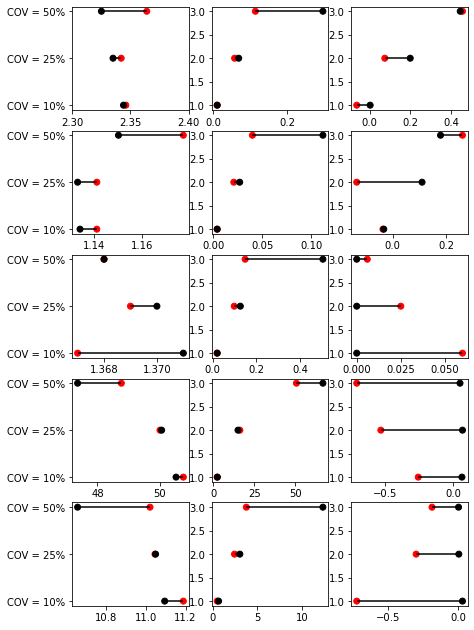

In [100]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9), (ax10,ax11,ax12), (ax13,ax14,ax15)) = plt.subplots(nrows=5, ncols=3)

ax1.scatter(ia_mean,x,color=['r','k','r','k','r','k'])
ax1.hlines(y=[1,2,3], xmin=ia_mean[0:6:2],xmax=ia_mean[1:7:2],color='k')
ax1.set_xlim(2.3,2.4)
ax1.set_xlabel('Impact area')
ax1.set_yticks((1,2,3))
ax1.set_yticklabels(('COV = 10%','COV = 25%','COV = 50%'))
ax2.scatter(ia_var,x,color=['r','k','r','k','r','k'])
ax2.hlines(y=[1,2,3], xmin=ia_var[0:6:2],xmax=ia_var[1:7:2],color='k')
ax3.scatter(ia_skew,x,color=['r','k','r','k','r','k'])
ax3.hlines(y=[1,2,3], xmin=ia_skew[0:6:2],xmax=ia_skew[1:7:2],color='k')

ax4.scatter(da_mean,x,color=['r','k','r','k','r','k'])
ax4.hlines(y=[1,2,3], xmin=da_mean[0:6:2],xmax=da_mean[1:7:2],color='k')
ax4.set_yticks((1,2,3))
ax4.set_yticklabels(('COV = 10%','COV = 25%','COV = 50%'))
ax5.scatter(da_var,x,color=['r','k','r','k','r','k'])
ax5.hlines(y=[1,2,3], xmin=da_var[0:6:2],xmax=da_var[1:7:2],color='k')
ax6.scatter(da_skew,x,color=['r','k','r','k','r','k'])
ax6.hlines(y=[1,2,3], xmin=da_skew[0:6:2],xmax=da_skew[1:7:2],color='k')

ax7.scatter(dv_mean,x,color=['r','k','r','k','r','k'])
ax7.hlines(y=[1,2,3], xmin=dv_mean[0:6:2],xmax=dv_mean[1:7:2],color='k')
ax7.set_yticks((1,2,3))
ax7.set_yticklabels(('COV = 10%','COV = 25%','COV = 50%'))
ax8.scatter(dv_var,x,color=['r','k','r','k','r','k'])
ax8.hlines(y=[1,2,3], xmin=dv_var[0:6:2],xmax=dv_var[1:7:2],color='k')
ax9.scatter(dv_skew,x,color=['r','k','r','k','r','k'])
ax9.hlines(y=[1,2,3], xmin=dv_skew[0:6:2],xmax=dv_skew[1:7:2],color='k')

ax10.scatter(vmax_mean,x,color=['r','k','r','k','r','k'])
ax10.hlines(y=[1,2,3], xmin=vmax_mean[0:6:2],xmax=vmax_mean[1:7:2],color='k')
ax10.set_yticks((1,2,3))
ax10.set_yticklabels(('COV = 10%','COV = 25%','COV = 50%'))
ax11.scatter(vmax_var,x,color=['r','k','r','k','r','k'])
ax11.hlines(y=[1,2,3], xmin=vmax_var[0:6:2],xmax=vmax_var[1:7:2],color='k')
ax12.scatter(vmax_skew,x,color=['r','k','r','k','r','k'])
ax12.hlines(y=[1,2,3], xmin=vmax_skew[0:6:2],xmax=vmax_skew[1:7:2],color='k')

ax13.scatter(hmax_mean,x,color=['r','k','r','k','r','k'])
ax13.hlines(y=[1,2,3], xmin=hmax_mean[0:6:2],xmax=hmax_mean[1:7:2],color='k')
ax13.set_yticks((1,2,3))
ax13.set_yticklabels(('COV = 10%','COV = 25%','COV = 50%'))
ax14.scatter(hmax_var,x,color=['r','k','r','k','r','k'])
ax14.hlines(y=[1,2,3], xmin=hmax_var[0:6:2],xmax=hmax_var[1:7:2],color='k')
ax15.scatter(hmax_skew,x,color=['r','k','r','k','r','k'])
ax15.hlines(y=[1,2,3], xmin=hmax_skew[0:6:2],xmax=hmax_skew[1:7:2],color='k')

plt.rcParams['figure.figsize'] = [18/2.54,28/2.54]